# Real estate price

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/Real%20estate.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df = df.drop(['No','X5 latitude','X6 longitude'], axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [4]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [6]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int64  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 16.3 KB


### Dataset Explanation

1. **X1 transaction date** (`int32`):  
   - Represents the year of the transaction, indicating when the real estate sale occurred.  
   - Example: 2012 or 2013.

2. **X2 house age** (`float64`):  
   - The age of the house in years at the time of the transaction.  
   - Example: 32.0 means the house is 32 years old.

3. **X3 distance to the nearest MRT station** (`float64`):  
   - The distance from the house to the nearest MRT station, measured in meters.  
   - Example: 84.87882 meters.

4. **X4 number of convenience stores** (`int64`):  
   - The number of convenience stores within a certain vicinity of the house.  
   - Example: 10 means there are 10 convenience stores nearby.

5. **Y house price of unit area** (`float64`):  
   - The price per unit area (e.g., per square meter) of the house during the transaction.  
   - Example: 37.9 means 37.9 currency units per square meter.


# Continue....

### Steps for Regression Analysis

#### **1. Split the Dataset**
- Split the data into **training (70%)** and **testing (30%)** subsets.
- Use the `train_test_split` function to ensure randomness in the split.
- Define:
  - **Features (X)**: `X1 transaction date`, `X2 house age`, `X3 distance to the nearest MRT station`, `X4 number of convenience stores`.
  - **Target (Y)**: `Y house price of unit area`.

#### **2. Check Correlation**
- Compute the correlation matrix to understand the relationships between features and the target variable.
- Visualize the correlation matrix using a **heatmap**:
  - Strong correlations between features and the target suggest potential predictors.
  - Identify multicollinearity (strong correlations between features), which might affect regression models.

#### **3. Apply Regression Models**

**a. Linear Regression**
1. Train a **Linear Regression** model using the training data.
2. Predict the target values using the testing data.

**b. Polynomial Regression**
1. Use `PolynomialFeatures` to generate polynomial terms for the features (e.g., degree = 2 or 3).
2. Train a **Linear Regression** model on the transformed polynomial features.
3. Predict the target values using the transformed testing data.

#### **4. Evaluate Model Performance**
- Evaluate both Linear and Polynomial Regression models using:
  1. **Mean Squared Error (MSE)**:
     - Measures the average squared difference between predicted and actual values.
     - Lower MSE indicates better performance.
  2. **R-squared (R²)**:
     - Measures how well the model explains the variability of the target variable.
     - Higher R² indicates better performance.
- Compare the results to determine which model performs better.

#### **5. Visualize Results**
- Plot **actual vs. predicted values** for both Linear and Polynomial Regression.
- For Polynomial Regression, visualize the curve fitting to see how well it models the data.


In [8]:
#1

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [11]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
Y house price of unit area                0
dtype: int64

In [12]:
x = df.drop(["Y house price of unit area"],axis=1)
x.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,2012,32.0,84.87882,10
1,2012,19.5,306.59470,9
2,2013,13.3,561.98450,5
3,2013,13.3,561.98450,5
4,2012,5.0,390.56840,5


In [13]:
x.shape

(414, 4)

In [14]:
y = df[["Y house price of unit area"]]
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [15]:
y.shape

(414, 1)

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=0.7, random_state=5)

In [17]:
xtrain.shape

(289, 4)

In [18]:
ytrain.shape

(289, 1)

In [19]:
xtest.shape

(125, 4)

In [20]:
df.shape

(414, 5)

In [21]:
heatmap = df.corr()
heatmap

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X1 transaction date,1.000000,0.049171,0.016519,-0.005586,0.081545
X2 house age,0.049171,1.000000,0.025622,0.049593,-0.210567
X3 distance to the nearest MRT station,0.016519,0.025622,1.000000,-0.602519,-0.673613
X4 number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.571005
Y house price of unit area,0.081545,-0.210567,-0.673613,0.571005,1.000000


In [22]:
#2

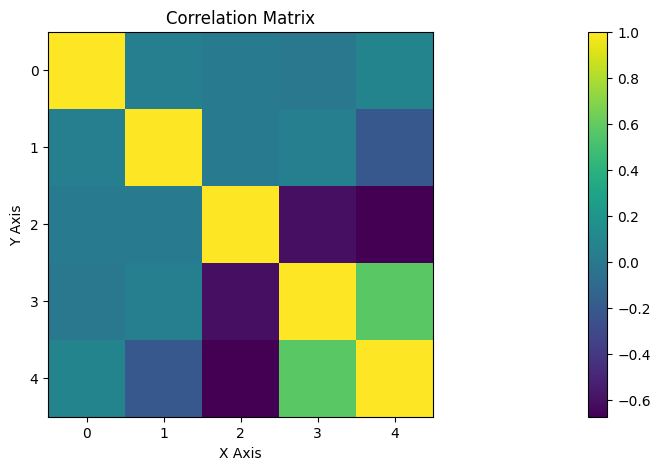

In [23]:
plt.figure(figsize=(40,5))
plt.imshow(heatmap)
plt.title("Correlation Matrix")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.colorbar()
plt.show()

In [24]:
#3

In [25]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(xtrain,ytrain)

LinearRegression()

In [26]:
y_pred = reg1.predict(xtest)

In [27]:
y_pred

array([[32.65198349],
       [45.18579748],
       [32.16266211],
       [35.54308875],
       [41.13726977],
       [47.93434362],
       [54.27935108],
       [44.56180272],
       [35.54099835],
       [42.05611424],
       [38.50571035],
       [35.22690235],
       [41.24282362],
       [43.51530421],
       [53.20422168],
       [37.56241619],
       [44.80166072],
       [43.11816943],
       [50.65137507],
       [49.26446637],
       [41.29408029],
       [19.20004504],
       [44.69900392],
       [45.13104756],
       [51.09561115],
       [44.8837856 ],
       [36.87333032],
       [40.84558817],
       [22.21553402],
       [41.9361709 ],
       [48.54261915],
       [36.01454308],
       [35.89677713],
       [53.34823948],
       [38.3288439 ],
       [14.00075187],
       [48.60385037],
       [48.65211898],
       [35.99948098],
       [40.10019739],
       [33.73120654],
       [34.18873717],
       [33.42623488],
       [41.42125082],
       [49.75466679],
       [39

In [28]:
reg1.score(xtrain,ytrain)

0.5284202768436965

In [29]:
reg1.score(xtest,ytest) 

0.6102498973844137

In [30]:
#b

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
x.shape

(414, 4)

In [33]:
y.shape

(414, 1)

In [34]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [35]:
x_poly.shape

(414, 15)

In [36]:
pd.DataFrame(x_poly)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,2012.0,32.0,84.87882,10.0,4048144.0,64384.0,1.707762e+05,20120.0,1024.00,2716.122240,320.0,7.204414e+03,848.78820,100.0
1,1.0,2012.0,19.5,306.59470,9.0,4048144.0,39234.0,6.168685e+05,18108.0,380.25,5978.596650,175.5,9.400031e+04,2759.35230,81.0
2,1.0,2013.0,13.3,561.98450,5.0,4052169.0,26772.9,1.131275e+06,10065.0,176.89,7474.393850,66.5,3.158266e+05,2809.92250,25.0
3,1.0,2013.0,13.3,561.98450,5.0,4052169.0,26772.9,1.131275e+06,10065.0,176.89,7474.393850,66.5,3.158266e+05,2809.92250,25.0
4,1.0,2012.0,5.0,390.56840,5.0,4048144.0,10060.0,7.858236e+05,10060.0,25.00,1952.842000,25.0,1.525437e+05,1952.84200,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1.0,2013.0,13.7,4082.01500,0.0,4052169.0,27578.1,8.217096e+06,0.0,187.69,55923.605500,0.0,1.666285e+07,0.00000,0.0
410,1.0,2012.0,5.6,90.45606,9.0,4048144.0,11267.2,1.819976e+05,18108.0,31.36,506.553936,50.4,8.182299e+03,814.10454,81.0
411,1.0,2013.0,18.8,390.96960,7.0,4052169.0,37844.4,7.870218e+05,14091.0,353.44,7350.228480,131.6,1.528572e+05,2736.78720,49.0
412,1.0,2013.0,8.1,104.81010,5.0,4052169.0,16305.3,2.109827e+05,10065.0,65.61,848.961810,40.5,1.098516e+04,524.05050,25.0


In [37]:
xtrain, xtest,ytrain, ytest = train_test_split(x_poly,y, test_size=0.7,random_state=3)

In [38]:
reg2 = LinearRegression()
reg2.fit(xtrain, ytrain)

LinearRegression()

In [39]:
xtrain.shape

(124, 15)

In [40]:
reg2.predict(xtrain)

array([[54.57123104],
       [42.12662015],
       [51.27702787],
       [42.56133598],
       [40.32181374],
       [18.03155369],
       [29.23552814],
       [19.5263964 ],
       [51.74756422],
       [25.85522979],
       [25.35111633],
       [27.11762604],
       [22.22141536],
       [29.33097676],
       [44.26939559],
       [43.56228253],
       [19.42875483],
       [37.44132014],
       [31.43664951],
       [28.0443461 ],
       [42.79640111],
       [19.82671287],
       [35.51161325],
       [44.62918755],
       [19.59953451],
       [42.61612145],
       [54.57123104],
       [50.41055005],
       [55.06511888],
       [37.32464379],
       [29.20466883],
       [28.66809703],
       [32.71106549],
       [38.00172445],
       [35.36619959],
       [56.32000344],
       [28.26828057],
       [41.4159486 ],
       [32.09254262],
       [35.19762756],
       [25.12523006],
       [34.61162986],
       [48.76879648],
       [51.16792559],
       [25.11031804],
       [36

In [41]:
reg2.predict(xtrain)

array([[54.57123104],
       [42.12662015],
       [51.27702787],
       [42.56133598],
       [40.32181374],
       [18.03155369],
       [29.23552814],
       [19.5263964 ],
       [51.74756422],
       [25.85522979],
       [25.35111633],
       [27.11762604],
       [22.22141536],
       [29.33097676],
       [44.26939559],
       [43.56228253],
       [19.42875483],
       [37.44132014],
       [31.43664951],
       [28.0443461 ],
       [42.79640111],
       [19.82671287],
       [35.51161325],
       [44.62918755],
       [19.59953451],
       [42.61612145],
       [54.57123104],
       [50.41055005],
       [55.06511888],
       [37.32464379],
       [29.20466883],
       [28.66809703],
       [32.71106549],
       [38.00172445],
       [35.36619959],
       [56.32000344],
       [28.26828057],
       [41.4159486 ],
       [32.09254262],
       [35.19762756],
       [25.12523006],
       [34.61162986],
       [48.76879648],
       [51.16792559],
       [25.11031804],
       [36

In [42]:
y_pred2 = reg2.predict(xtest)

In [43]:
y_pred2

array([[37.09979549],
       [42.51542646],
       [39.52186961],
       [52.97817214],
       [32.19848409],
       [36.04863444],
       [19.84350828],
       [43.27407501],
       [57.45744654],
       [51.98776783],
       [54.69955765],
       [30.95382931],
       [52.30183759],
       [46.80617528],
       [47.0927822 ],
       [38.49577458],
       [40.18638269],
       [28.65476993],
       [36.08707832],
       [ 4.80100532],
       [57.59563195],
       [31.03668917],
       [21.56906075],
       [19.4370178 ],
       [30.8101687 ],
       [40.91881763],
       [38.89116847],
       [48.46924163],
       [22.86378771],
       [51.51844604],
       [45.91634035],
       [48.7167363 ],
       [58.36971846],
       [19.82873092],
       [44.97350172],
       [38.42275702],
       [41.96101824],
       [43.30376249],
       [57.59563195],
       [45.71095416],
       [50.51568635],
       [46.38149949],
       [34.32621741],
       [42.52258298],
       [47.06010899],
       [44

In [44]:
xtest.shape

(290, 15)

In [45]:
reg2.score(xtrain,ytrain)

0.6696821217541362

In [46]:
reg2.score(xtest,ytest)

0.5909995020059515

In [47]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
pipeline.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [48]:
pipeline.predict(x)

array([[45.01195986],
       [42.23629655],
       [42.0811231 ],
       [42.0811231 ],
       [47.03161723],
       [26.73838472],
       [35.74826003],
       [43.90095337],
       [18.376963  ],
       [27.04037081],
       [36.66760604],
       [54.62563745],
       [39.95091402],
       [18.36523842],
       [34.55931821],
       [36.95077335],
       [55.59174544],
       [33.58353553],
       [44.42239103],
       [57.1709969 ],
       [28.42195067],
       [48.36411208],
       [27.90025144],
       [48.58784223],
       [41.51481114],
       [28.81163253],
       [48.82954003],
       [47.48354025],
       [39.38306064],
       [47.14705035],
       [18.79585569],
       [33.45572111],
       [29.52487645],
       [44.52171384],
       [44.10829497],
       [19.08036971],
       [24.533274  ],
       [32.80306094],
       [46.84135361],
       [44.46685717],
       [19.13563129],
       [18.67226725],
       [40.82822944],
       [36.10771432],
       [48.95289651],
       [43

In [49]:
#pipeline.predict([[114523.61, 136897.80, 471784.10]]) (this code created problems when it executed

In [50]:
pipeline.predict([[4255771.3564, 5421.2354, 415322.6541,541232.639845]])

C:\Users\mstum\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[-8.49548062e+11]])

In [51]:
x.shape


(414, 4)

In [52]:
pipeline.score(x,y)

0.6355793893766966

In [53]:
y_pred.shape

(125, 1)

In [54]:
#4 -1

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [56]:
#mse = mean_squared_error(y_pred,ytest)   
#mse  (this code created problems when it exicuted

In [57]:
mse_poly = mean_squared_error(y_pred2,ytest)   
mse_poly

75.75265111113399

In [58]:
#4-2

In [59]:
x.shape

(414, 4)

In [60]:
y.shape

(414, 1)

In [61]:
#5

In [62]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
# to visualize the data

In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

In [64]:
lasso_model = Lasso()
lasso_model.fit(xtrain,ytrain)

Lasso()

In [65]:
ridge_model = Ridge()
ridge_model.fit(xtrain,ytrain)

Ridge()

In [66]:
lasso_score = lasso_model.score(xtest,ytest)
lasso_score

0.5390090746378506

In [67]:
ridge_score = ridge_model.score(xtest,ytest)
ridge_score

0.5517395857733711

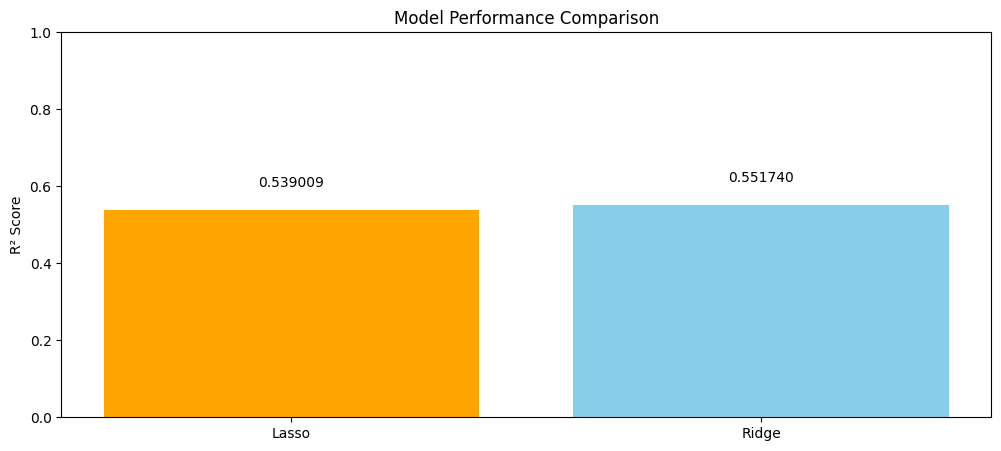

In [68]:
scores = [lasso_score, ridge_score]
models = ['Lasso', 'Ridge']

plt.figure(figsize=(12, 5))
for i, score in enumerate(scores):
    plt.text(i, score+.06, f'{score:.6f}', ha='center')

plt.bar(models, scores, color=['orange', 'skyblue'])
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()